**The study of bike sharing systems has gained significant traction due to their role in promoting sustainable urban transportation. This report focuses on the Bike Sharing Dataset, aiming to prepare the data for predictive modelling through a series of data cleaning and feature engineering tasks.**

## Loading the Dataset

In [1]:
!git clone https://github.com/mkjubran/ENCS5141Datasets.git

Cloning into 'ENCS5141Datasets'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 74 (delta 18), reused 62 (delta 9), pack-reused 0
Receiving objects: 100% (74/74), 23.51 MiB | 6.51 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Updating files: 100% (13/13), done.


In [2]:
import pandas as pd
import numpy as np
from numpy import isnan

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

In [3]:
pd.options.display.max_columns = 999

In [4]:
data = pd.read_csv("/content/ENCS5141Datasets/ENCS5141_BikeSharingDataset_Modified/hours.csv")
data = pd.DataFrame(data)

data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/11,Spring,0,1.0,0,0.0,Saturday,0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2,1/1/11,Spring,0,1.0,1,0.0,Saturday,0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3,1/1/11,Spring,0,1.0,2,0.0,Saturday,0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4,1/1/11,Spring,0,1.0,3,0.0,Saturday,0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5,1/1/11,Spring,0,1.0,4,0.0,Saturday,0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


Right away, we can see that the dataset has 17 features. Including numerical, categorical, and non-numeric features.
-	Instant: Index of record.
-	Mnth: Month of record.
-	Workingday: If record on a workday.
-	Hum: Humidity.
- Dteday: Date of record.
-	Hr: Hour of record.
-	Weathersit: Weather condition
-	Windspeed: Speed of wind.
-	Season: Season record is in.
-	Holiday: If record is during a holiday.
-	Temp: Temperature
-	Casual: # unregistered users.
-	Yr: Year of record.
-	Weekday: Day of record.
-	Atemp: Apparent temperature.
-	Registered: # registered users.
-	Cnt: casual and registered sum


## Data Exploration

### Initial Data Exploration

In [5]:
data.shape

(17379, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17378 non-null  float64
 5   hr          17379 non-null  int64  
 6   holiday     17367 non-null  float64
 7   weekday     17378 non-null  object 
 8   workingday  17379 non-null  int64  
 9   weathersit  17376 non-null  float64
 10  temp        16930 non-null  float64
 11  atemp       17324 non-null  float64
 12  hum         17086 non-null  float64
 13  windspeed   17071 non-null  float64
 14  casual      17344 non-null  float64
 15  registered  17363 non-null  float64
 16  cnt         17367 non-null  float64
dtypes: float64(10), int64(4), object(3)
memory usage: 2.3+ MB


Most of the columns have numeric data, while others are non-numeric, and some are categorical. Some features also have missing data, as their Non-Null Count is less than 17379.

In [7]:
data.describe()

,instant,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17378.000000,17379.000000,17367.000000,17379.000000,17376.000000,16930.000000,17324.000000,17086.000000,17071.000000,17344.000000,17363.000000,17367.000000
mean,8690.0000,0.502561,6.538094,11.546752,0.028790,0.682721,1.425184,0.496731,0.480431,0.626541,0.192688,35.642412,153.883603,189.520182
std,5017.0295,0.500008,3.438618,6.914405,0.167221,0.465431,0.639367,0.211812,0.289931,0.192888,0.242883,49.261964,151.387243,181.402041
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,116.000000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,1.000000,4.000000,7.000000,14.000000,1.000000,17.000000,367.000000,886.000000,977.000000


Some features are hard to read, and others aren’t really indicative/useful for the purpose of this case study.

In [8]:
data = data.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

Features like [instant, dteday, year] aren't really indicative and useful for the purpose of this exploration, so we can drop them.

In [9]:
data.drop(columns = ['instant' , 'dteday' , 'year'], inplace=True)
data.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,Spring,1.0,0,0.0,Saturday,0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,Spring,1.0,1,0.0,Saturday,0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,Spring,1.0,2,0.0,Saturday,0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,Spring,1.0,3,0.0,Saturday,0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,Spring,1.0,4,0.0,Saturday,0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


Now the features are more readable and easier to understand, and data such as instant (which is the index of records), dteday (date of the record), and year (year of the record) have been dropped since they aren’t useful.

Some features are categorical and should be defined as such.

In [10]:
cols = ['season' , 'month' , 'hour' , 'holiday' , 'weekday' , 'workingday' , 'weather']

for col in cols:
    data[col] = data[col].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17378 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17367 non-null  category
 4   weekday     17378 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17376 non-null  category
 7   temp        16930 non-null  float64 
 8   atemp       17324 non-null  float64 
 9   humidity    17086 non-null  float64 
 10  windspeed   17071 non-null  float64 
 11  casual      17344 non-null  float64 
 12  registered  17363 non-null  float64 
 13  count       17367 non-null  float64 
dtypes: category(7), float64(7)
memory usage: 1.0 MB


In [11]:
# Iterate through each column and print the count for each entry
for column in cols:
    print(f"the column {column} has: ", data[column].value_counts(), '\n')

the column season has:  season
Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: count, dtype: int64 

the column month has:  month
5.0     1488
7.0     1488
12.0    1483
8.0     1475
3.0     1473
10.0    1451
6.0     1440
4.0     1437
9.0     1437
11.0    1437
1.0     1428
2.0     1341
Name: count, dtype: int64 

the column hour has:  hour
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64 

the column holiday has:  holiday
0.0    16867
1.0      500
Name: count, dtype: int64 

the column weekday has:  weekday
Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2452
Name: count, dtype: int64 

the column workingday has:  workingday
1    11865
0     5514
Name: count, dtype: int64 

the column

In [12]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]
missing_values[missing_values > 0].to_frame().T

,month,holiday,weekday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,12,1,3,449,55,293,308,35,16,12


We can see that these 11 features have missing data in varying amounts, they will be handled in upcoming sections.

### Data Visualization

Bar plots can be plotted for the categorical features as follows.

<Figure size 500x500 with 0 Axes>

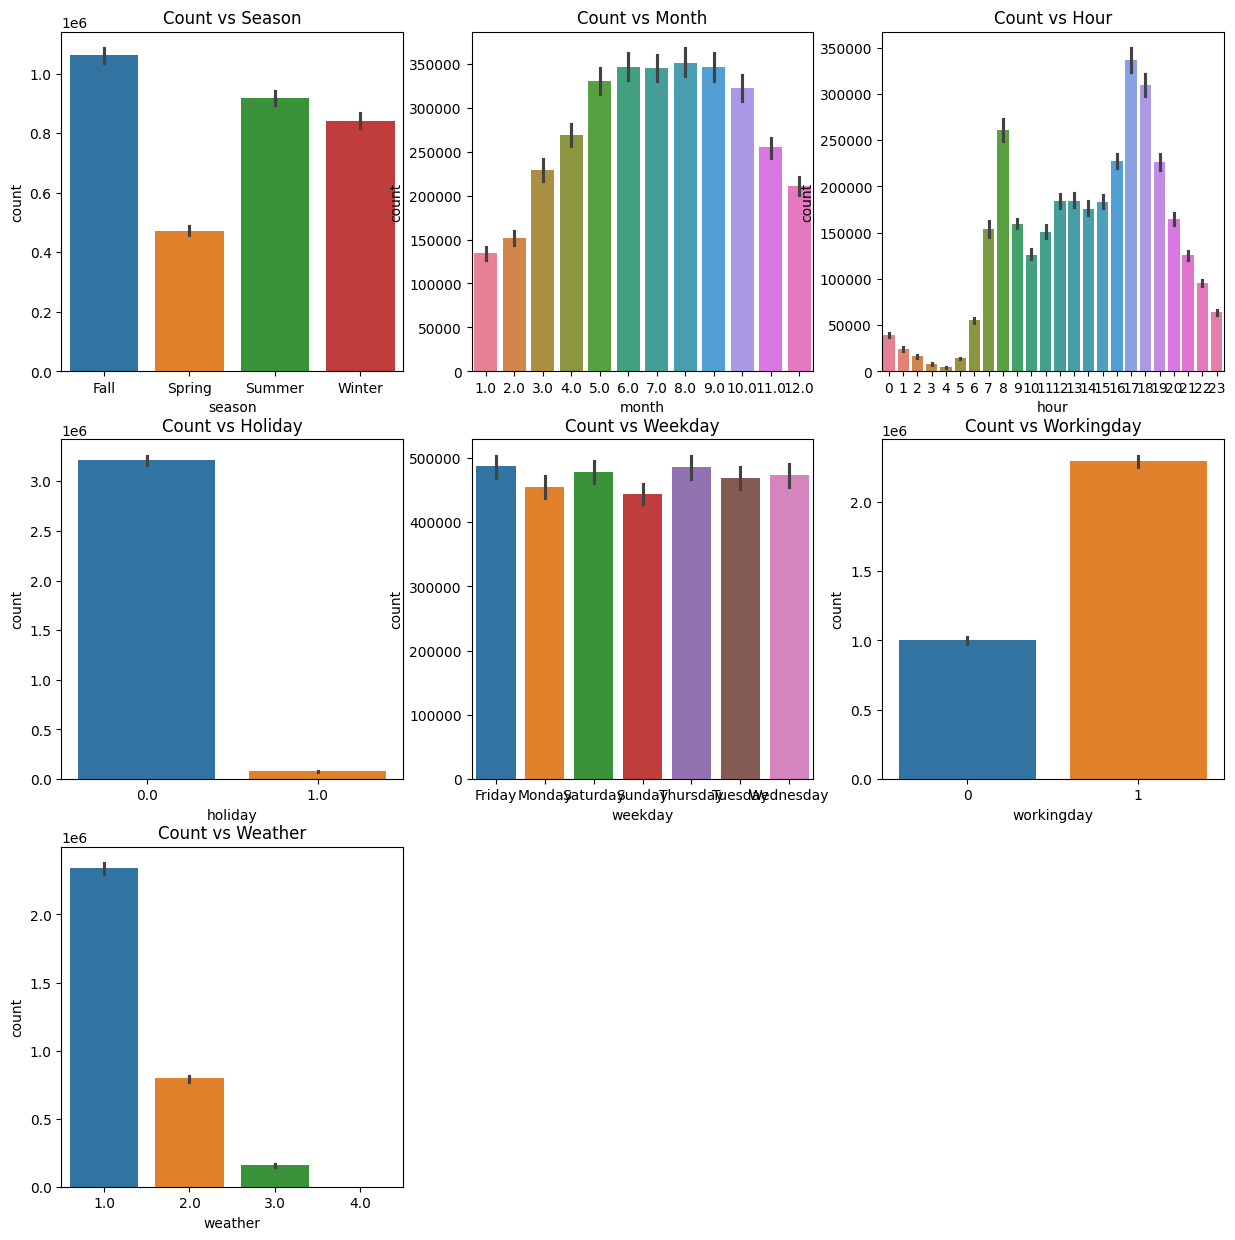

In [13]:
plt.figure(figsize=(5,5))
counter=1
plt.figure(figsize=(15,15))

cols = ['season' , 'month' , 'hour' , 'holiday' , 'weekday' , 'workingday' , 'weather']

for column in cols:
  plt.subplot(3,3,counter)
  sns.barplot(x=column, data=data, y='count', hue=column, legend=False, estimator=sum)
  plt.title(f"Count vs {column.capitalize()}")
  counter+=1

plt.show()

-	**Count vs Season**: Bike rentals peak during Fall and are lowest during Spring. Which means Fall is the peak season, possibly for its weather conditions that suit biking most.
-	**Count vs Month:** Bike rentals increase steadily from January till June, then stay at the peak around mid-year, then decline towards December. Indicating that warmer months tend to have more bike rentals.
-	**Count vs Hour:** Bike rentals peak in the morning around 7-9 AM, and in the evening around 5-6 PM, then drop during the night. Which corresponds to typical peak and commuting hours in general.
-	**Count vs Holiday:** Bike rentals are much higher on non-holidays than on holidays. Suggesting that bike rentals are more likely used for commuting and errands, rather than for fun and weekends.
-	**Count vs Weekday:** Bike rentals are considerably high on all weekdays with slight variations between them. Which might suggest a steady demand for bike sharing during the workday, likely because of regular commuters/users. The slight variations may result from different work schedules or from the weather on particular days.
-	**Count vs Workingday:** Bike rentals are higher, more than double, on working days compared to non-working days. This indicates that bike sharing is mostly utilized for commuting, which is consistent with the pattern shown in the "Count vs Holiday" plot.
-	**Count vs Weather:** Bike rentals are highest in clear or fair-weather conditions, and decline as weather conditions worsen. This shows how weather plays a big role in the number of users.


The relation between registered and unregistered (casual) users against the total count can be plotted as follows.

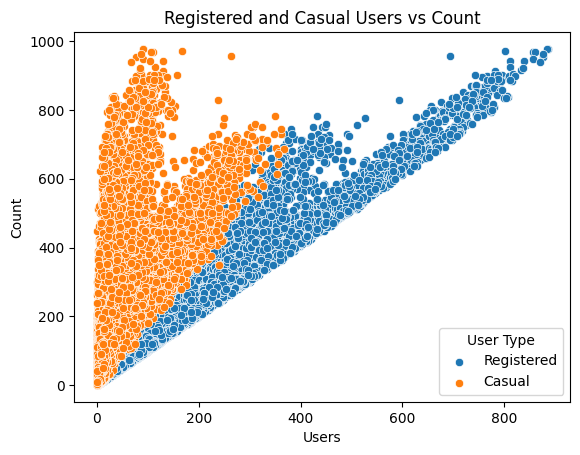

In [14]:
sns.scatterplot(data=data, x='registered', y='count', label='Registered', marker='o')
sns.scatterplot(data=data, x='casual', y='count', label='Casual', marker='o')

plt.xlabel('Users')
plt.ylabel('Count')
plt.title('Registered and Casual Users vs Count')
plt.legend(title='User Type')

plt.show()

Registered users have a greater impact on the total count because their rental numbers are generally higher. Casual users, on the other hand, have points clustered in lower counts, demonstrating a lower correlation between casual users and total count.

the total count of bike rentals per hour according to the weekdays:

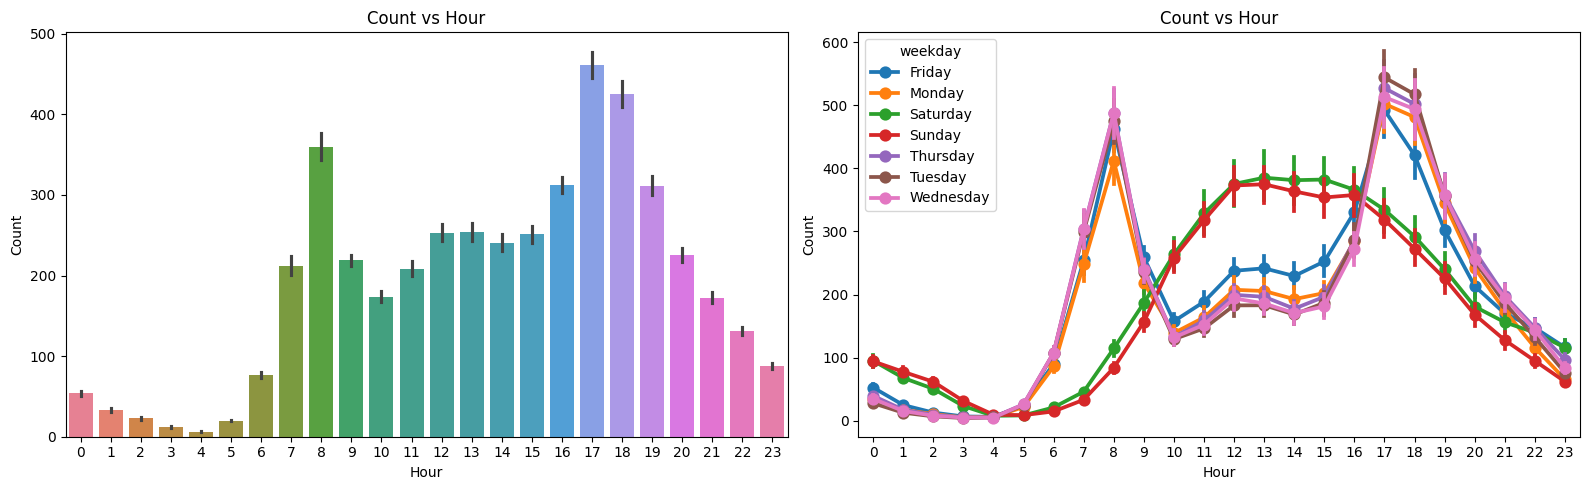

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(data=data, x='hour', y='count', hue='hour', ax=axes[0], legend=False)
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')
axes[0].set_title('Count vs Hour')

sns.pointplot(data=data, x='hour', y='count', hue='weekday', ax=axes[1])
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Count')
axes[1].set_title('Count vs Hour')

plt.tight_layout()
plt.show()

Bike rentals peak in the morning around 7-9 AM, and in the evening around 5-6 PM, then drop during the night. Which corresponds to typical peak and commuting hours in general. But there’s a bump during mid-noon on the weekends. Plotting casual and registered users separately could help explain it.

**Casual:**

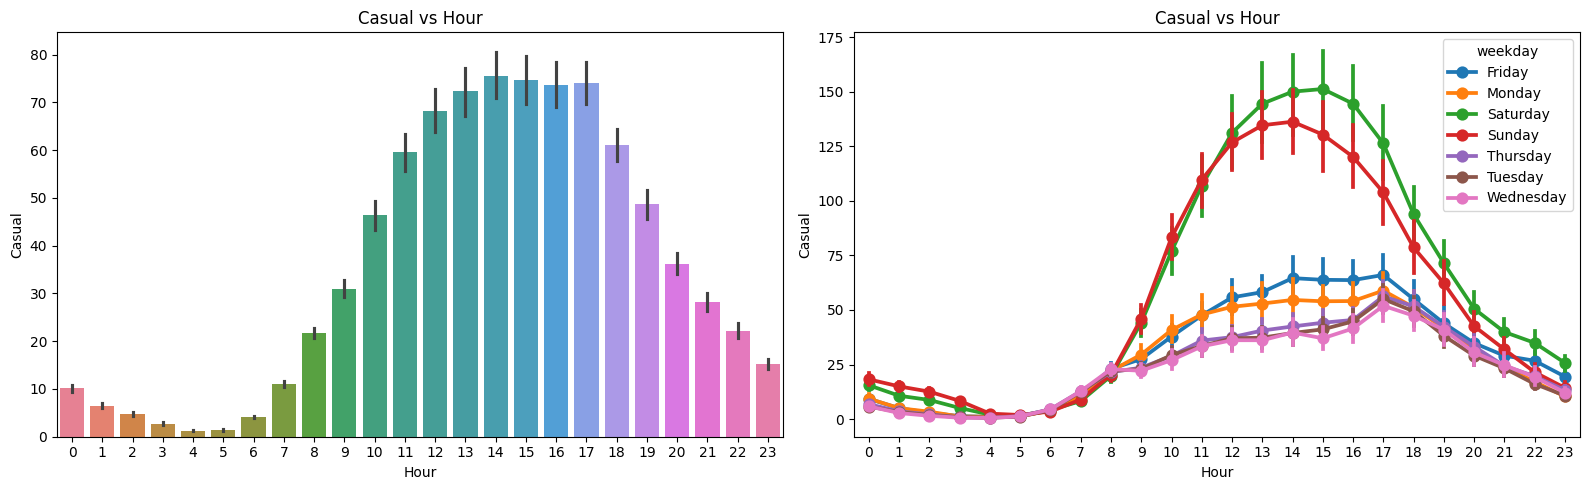

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(data=data, x='hour', y='casual', hue='hour', ax=axes[0], legend=False)
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Casual')
axes[0].set_title('Casual vs Hour')

sns.pointplot(data=data, x='hour', y='casual', hue='weekday', ax=axes[1])
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Casual')
axes[1].set_title('Casual vs Hour')

plt.tight_layout()
plt.show()

**Registered:**

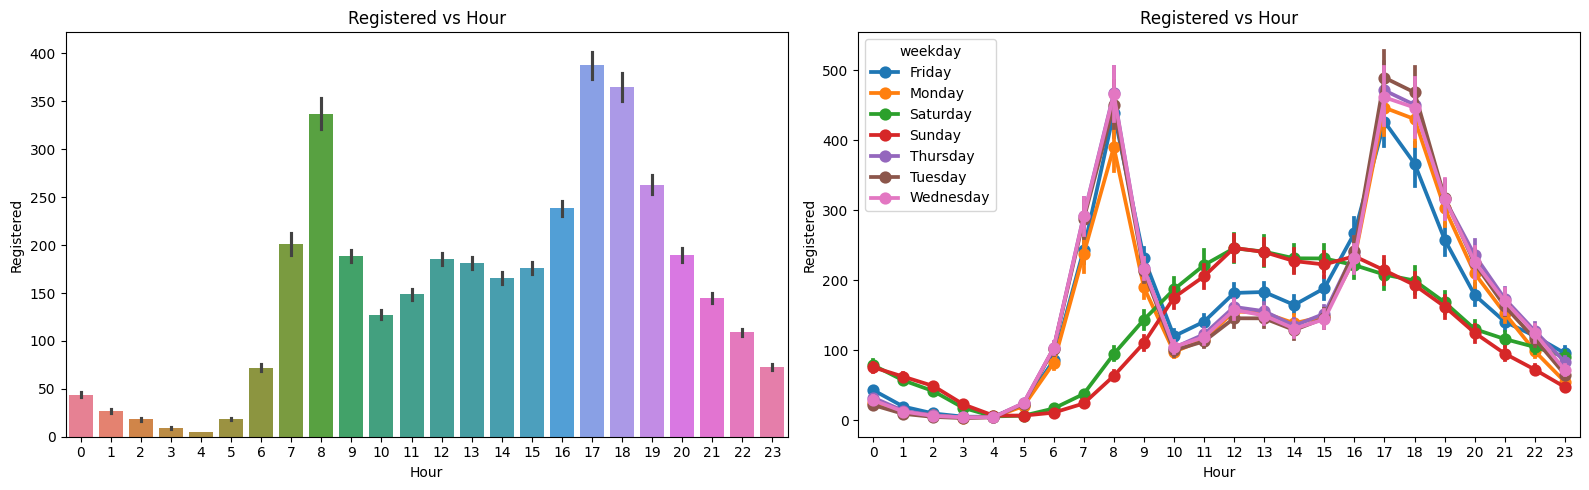

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(data=data, x='hour', y='registered', hue='hour', ax=axes[0], legend=False)
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Registered')
axes[0].set_title('Registered vs Hour')

sns.pointplot(data=data, x='hour', y='registered', hue='weekday', ax=axes[1])
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Registered')
axes[1].set_title('Registered vs Hour')

plt.tight_layout()
plt.show()

The plot of registered users suggest that those users primarily use the system during peak commute hours and on working days, while still using it during mid-noon on weekends. Casual users on the other hand, primarily use the system on weekends during mid-noon, as they don’t rely on it for daily usage. The combined plots of users during the weekend are what caused the bump mentioned earlier.

the total count of users per hour, grouped by different seasons and weather conditions:

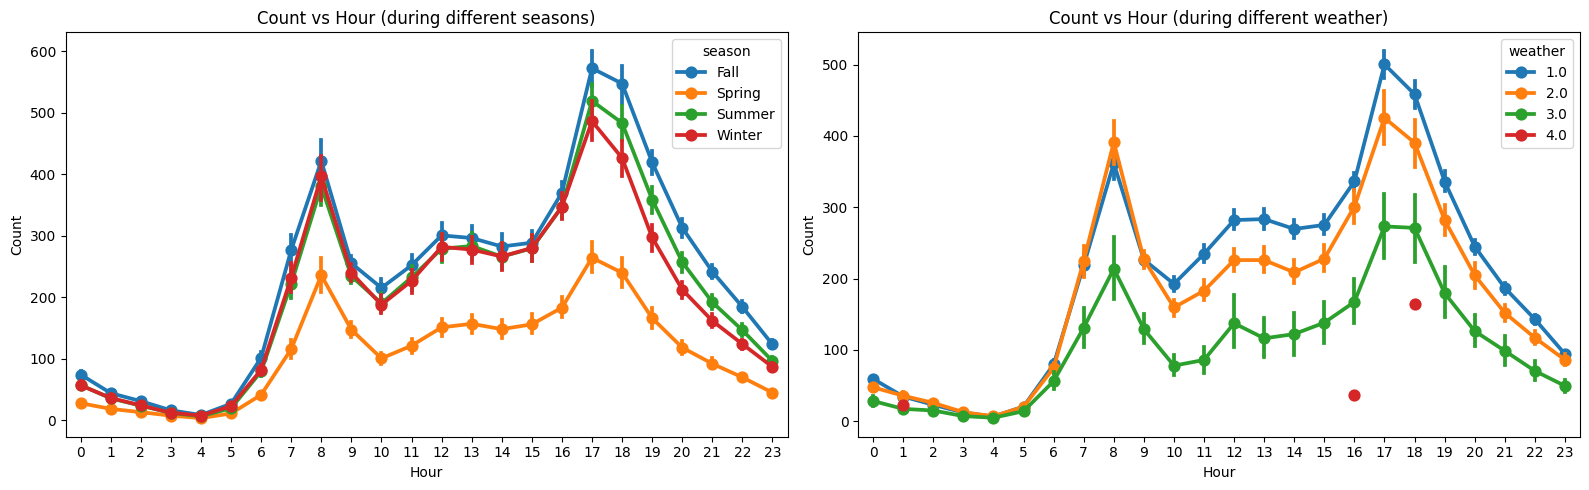

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

features = ['season', 'weather']
titles = [
    'Count vs Hour (during different seasons)',
    'Count vs Hour (during different weather)'
]

for i, feature in enumerate(features):
    sns.pointplot(data=data, x='hour', y='count', hue=feature, ax=axes[i])
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Count')
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

Peak hours in fall and summer lead to higher bike rentals, while rentals decrease in spring and winter, especially in spring. Weather, also, has a substantial impact on bike rentals. Clear/partly cloudy conditions lead the highest rentals, particularly during peak hours. Misty/cloudy conditions result in somewhat decreased rentals, however light rain/snow conditions cause a significant drop in rentals. Heavy rain/snow conditions greatly reduce bike usage, indicating poor weather conditions. Therefore, understanding these weather conditions is critical for maximizing bike rentals.

count per weekday/month grouped by season:

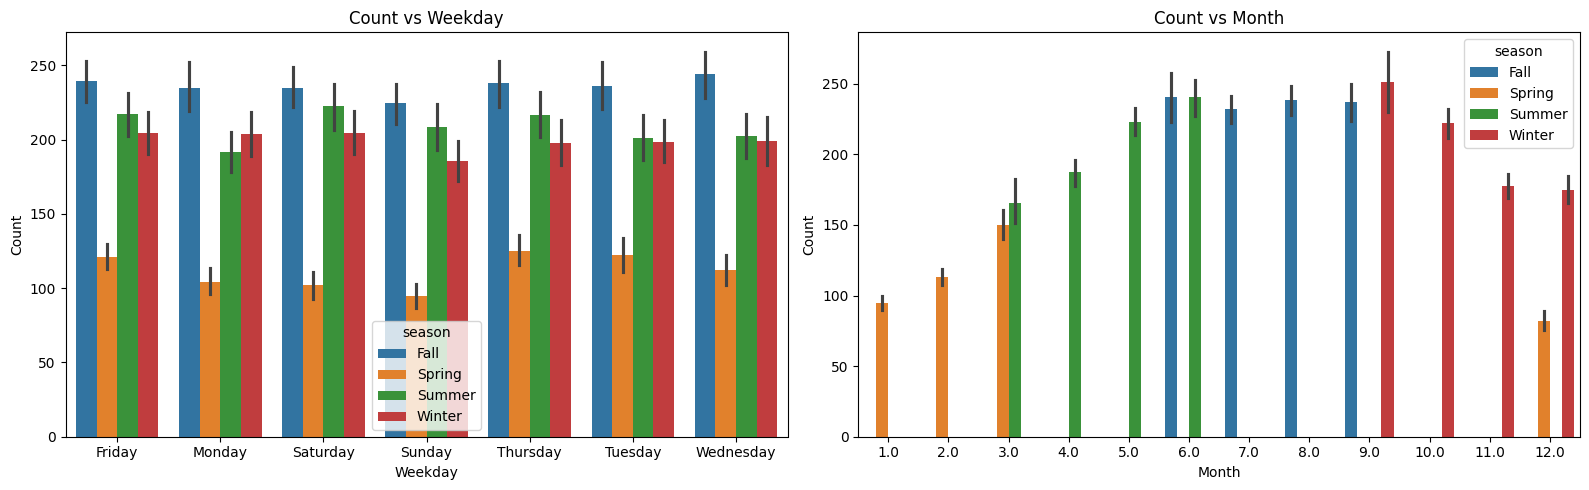

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

features = ['weekday', 'month']
titles = ['Count vs Hour (during different seasons)', 'Count vs Hour (during different weather)']

for i, feature in enumerate(features):
    sns.barplot(data=data, x=feature, y='count', hue='season', ax=axes[i])
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].set_title(f"Count vs {feature.capitalize()}")

plt.tight_layout()
plt.show()

### Handling Missing Data and Outliers

#### Detecting Missing Data

In [20]:
print(f"Number of records with empty data = {data.isnull().any(axis=1).sum()}")
print(f"Number of empty records = {data.isnull().all(axis=1).sum()}")
data[data.isnull().any(axis=1)].head()

Number of records with empty data = 1007
Number of empty records = 0


,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
16,Spring,1.0,16,0.0,Saturday,0,NaN,0.42,0.4242,0.82,0.2985,41.0,52.0,93.0
17,Spring,1.0,17,0.0,Saturday,0,NaN,0.44,0.4394,0.82,0.2836,15.0,52.0,67.0
23,Spring,1.0,23,0.0,Saturday,0,NaN,0.46,0.4545,0.88,0.2985,15.0,24.0,39.0
25,Spring,1.0,1,0.0,Sunday,0,2.0,NaN,0.4394,0.94,0.2537,1.0,16.0,17.0
26,Spring,1.0,2,0.0,Sunday,0,2.0,NaN,0.4242,1.00,0.2836,1.0,8.0,9.0


There are 1007 records containing empty data, but no fully empty records. To help decide how to handle the missing data, their percentage out of the entire data should be calculated. Which could be done using the following code.

In [21]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]
missing_values[missing_values > 0].to_frame().T

,month,holiday,weekday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,12,1,3,449,55,293,308,35,16,12


In [22]:
missing_values_percentage = (missing_values / len(data)) * 100
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]
missing_values_percentage.to_frame().T

,month,holiday,weekday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0.005754,0.069049,0.005754,0.017262,2.583578,0.316474,1.685943,1.772254,0.201392,0.092065,0.069049


If we take a threshold of 0.25% which equals to 43.4475 of the total entries (17379 * 0.0025). Then we can determine which records are safe to drop if they have missing values.
</br>

Records with missing values in the following features are safe to drop **[month, holiday, weekday, weather, casual, registered, count]**. The rest **[temp, atemp, humidityidity, windspeed]** are above the threshold so we need to find other ways to handle their missing data, such as imputation.

#### Handling Missing Data

##### Drop Records From Features Below the Threshold

In [23]:
features_to_drop_records_from = ['month', 'holiday', 'weekday', 'weather', 'casual', 'registered', 'count']
data.dropna(subset=features_to_drop_records_from, inplace=True)

In [24]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

temp         435
atemp         53
humidity     293
windspeed    307
dtype: int64

We're now left with the features above the set threshold, we'll examine them to decide how to handle their missing data. But first, we need to handle the non-numeric features to make sure we can examine the correlations correctly. We'll do that later after detecting outliers.

##### Label-Encoding of Non-Numeric Features on a Copy of the Data

We need to do label encoding on the non-numeric features to proceed with handling missing values, since we're going to be finding the correlation between features.

In [25]:
label_encoder = LabelEncoder()
data_copy = data.copy()

data_copy['season'] = label_encoder.fit_transform(data_copy['season'])
data_copy['weekday'] = label_encoder.fit_transform(data_copy['weekday'])

In [26]:
data_copy.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1.0,0,0.0,2,0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,1,1.0,1,0.0,2,0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,1,1.0,2,0.0,2,0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,1,1.0,3,0.0,2,0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,1,1.0,4,0.0,2,0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


##### Finding the correlation between the features

In [27]:
# data_copy.corr()

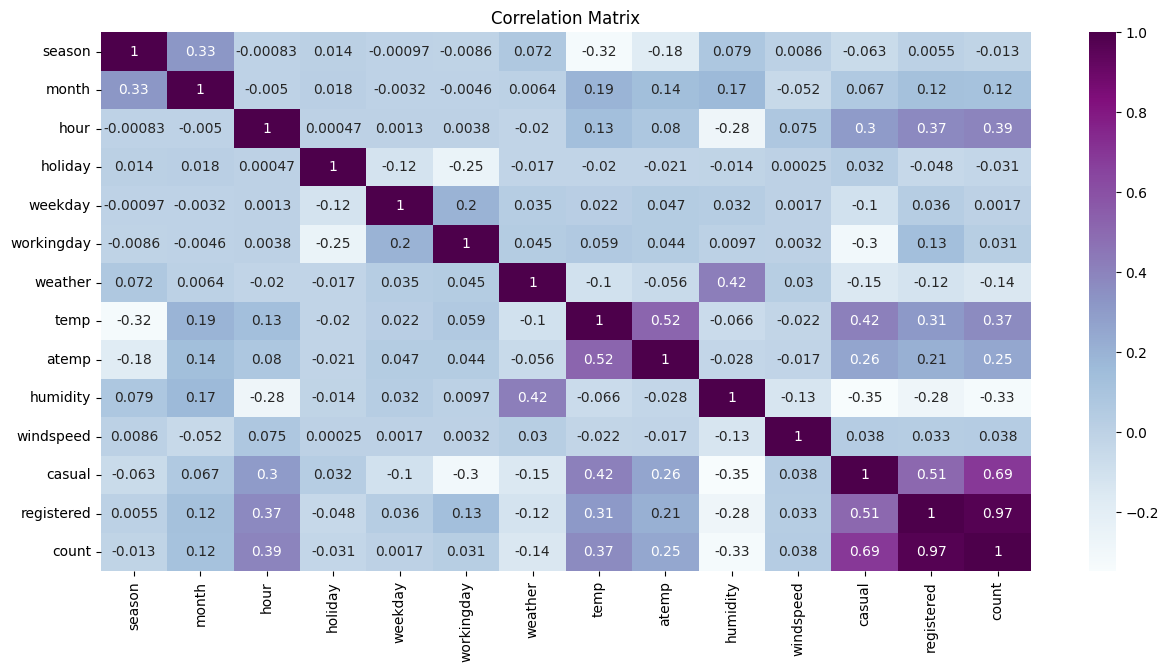

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(data_copy.corr(), annot=True, cmap='BuPu', annot_kws={'size':10})
plt.title('Correlation Matrix')
plt.show()

- The features 'temp' and 'atemp' have the highest correlation together.
- The feautre 'humidity' correlates the highest with 'weather'.
- 'windspeed' correlates the highest with 'humidity'.

##### Using the KNN technique to impute the missing values in the dataset according to the correlation between the features mentioned previously.

In [29]:
features_for_imputation = ['temp', 'atemp', 'humidity', 'windspeed']
data_for_imputation = data[features_for_imputation]
data = data.copy()

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
data_imputed = knn_imputer.fit_transform(data_for_imputation)
data_imputed_df = pd.DataFrame(data_imputed, columns=features_for_imputation, index=data_for_imputation.index)
data[features_for_imputation] = data_imputed_df[features_for_imputation]

data.isnull().sum().to_frame().T

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
print(f"Number of empty records = {data.isnull().any(axis=1).sum()}")
data[data.isnull().any(axis=1)]

Number of empty records = 0


,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [31]:
data.reset_index(drop=True, inplace=True)

Now, we're sure that all missing values have been handled and filled correctly.

#### Scaling Numerical Features

In [32]:
features = ['casual', 'registered', 'count']

scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000,17300.000000
mean,0.498825,0.481064,0.627176,0.192310,0.097299,0.173813,0.193348
std,0.210357,0.289923,0.191866,0.241341,0.134333,0.170922,0.185912
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500,0.010899,0.038375,0.039959
50%,0.500000,0.484800,0.630000,0.188080,0.046322,0.130926,0.144467
75%,0.660000,0.621200,0.780000,0.253700,0.130790,0.248307,0.286885
max,7.000000,14.000000,1.000000,17.000000,1.000000,1.000000,1.000000


After scaling, the ranges of the numeric features are the same. However, some features are showing max values above the range, this is due to them having outliers. Which will be detected and handled next.

#### Detecting outliers

##### Using Boxplot

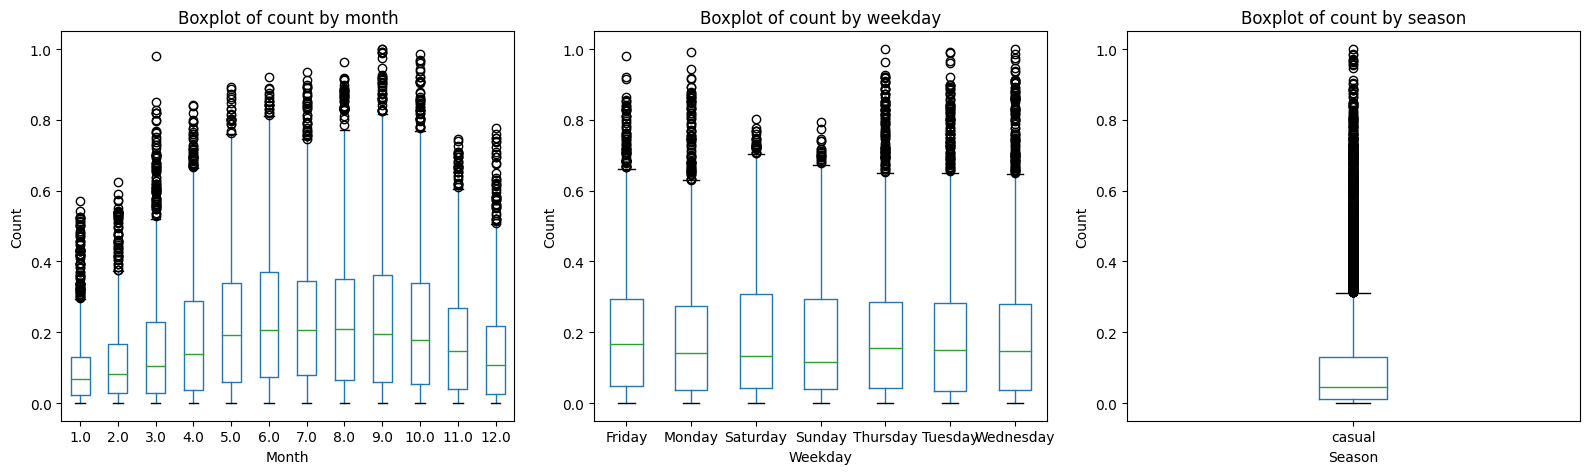

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

data.boxplot(by='month', column='count', grid=False, ax=axes[0])
axes[0].set_title('Boxplot of count by month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

data.boxplot(by='weekday', column='count', grid=False, ax=axes[1])
axes[1].set_title('Boxplot of count by weekday')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Count')

data.boxplot(column='casual', grid=False, ax=axes[2])
axes[2].set_title('Boxplot of count by season')
axes[2].set_xlabel('Season')
axes[2].set_ylabel('Count')

fig.suptitle('')
plt.tight_layout()
plt.show()

We can see here that the count feature has lots of outliers, and can be visualized by grouping them with different features.

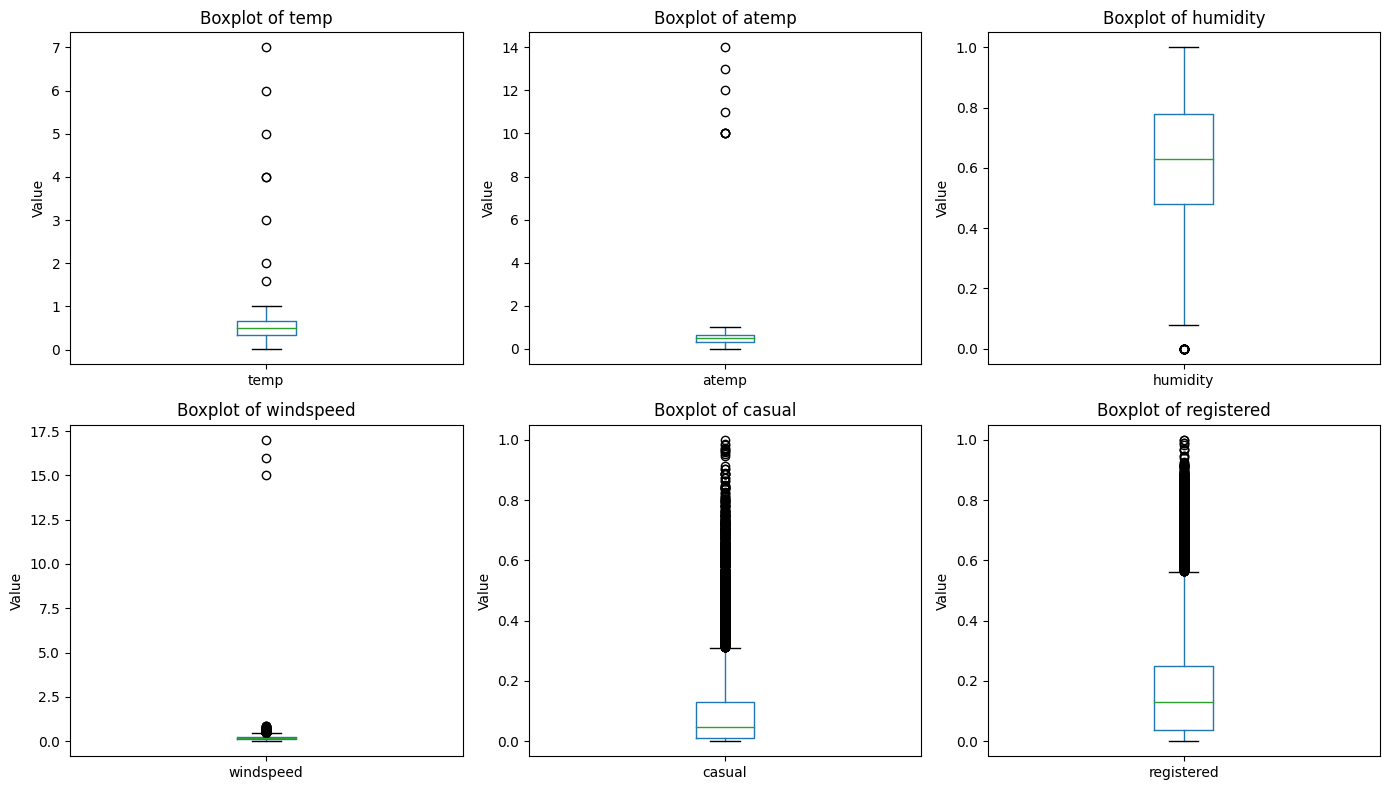

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# List of features to plot
features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

# Create boxplots for each feature
for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    data.boxplot(column=feature, grid=False, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}')
    axes[row, col].set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()


The above are the features that have outliers which definitely need handling.

##### Calculating IQR and Number of outliers

In [35]:
features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

percentile_25 = data[features].quantile(0.25)
percentile_50 = data[features].quantile(0.5)
percentile_75 = data[features].quantile(0.75)

iqr = percentile_75 - percentile_25

lower_bound = percentile_25 - 1.5*iqr
upper_bound = percentile_75 + 1.5*iqr

summary_table = pd.DataFrame({
    '25th Percentile': percentile_25,
    '50th Percentile': percentile_50,
    '75th Percentile': percentile_75,
    'IQR': iqr,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound
})

summary_table.T

,temp,atemp,humidity,windspeed,casual,registered,count
25th Percentile,0.34,0.33330,0.48,0.10450,0.010899,0.038375,0.039959
50th Percentile,0.50,0.48480,0.63,0.18808,0.046322,0.130926,0.144467
75th Percentile,0.66,0.62120,0.78,0.25370,0.130790,0.248307,0.286885
IQR,0.32,0.28790,0.30,0.14920,0.119891,0.209932,0.246926
Lower Bound,-0.14,-0.09855,0.03,-0.11930,-0.168937,-0.276524,-0.330430
Upper Bound,1.14,1.05305,1.23,0.47750,0.310627,0.563205,0.657275


In [36]:
outlier_info = {
    "# Outliers": [],
    "Max Outlier": [],
    "Min Outlier": [],
    "% of Outliers": []
}

for feature in features:
    outliers = data[(data[feature] < lower_bound[feature]) | (data[feature] > upper_bound[feature])]
    outlier_info["# Outliers"].append(len(outliers))
    outlier_info["Max Outlier"].append(outliers[feature].max())
    outlier_info["Min Outlier"].append(outliers[feature].min())
    outlier_info["% of Outliers"].append(100 * len(outliers) / len(data))

# Create a DataFrame to display the outlier information
outlier_info_df = pd.DataFrame(outlier_info, index=features)

outlier_info_df.T

,temp,atemp,humidity,windspeed,casual,registered,count
# Outliers,8.000000,8.000000,22.000000,338.000000,1187.000000,679.000000,504.000000
Max Outlier,7.000000,14.000000,0.000000,17.000000,1.000000,1.000000,1.000000
Min Outlier,1.600000,10.000000,0.000000,0.483580,0.313351,0.564334,0.657787
% of Outliers,0.046243,0.046243,0.127168,1.953757,6.861272,3.924855,2.913295


#### Handling Outliers

Taking a threshold of 1.0% (173 of total records) for the outliers, the outliers in [temp, atemp, humidity] can be removed as they have very little effect on the data. While the rest [windspeed, casual, registered, count] are above the threshold and must have considerable effect on the data. We'll be doing capping for them.

- Deleting outliers from [temp, atemp, humidity]:

In [37]:
filtered_data = data.copy()

features_for_dropping = ['temp', 'atemp', 'humidity']

for feature in features_for_dropping:
    filtered_data = filtered_data[(filtered_data[feature] >= lower_bound[feature]) & (filtered_data[feature] <= upper_bound[feature])]

In [38]:
print(filtered_data.shape)
print(f"Original dataset size: {len(data)}")
print(f"Cleaned dataset size: {len(filtered_data)}")

(17262, 14)
Original dataset size: 17300
Cleaned dataset size: 17262


Capping values for the rest of the feaures

In [39]:
for feature in ['windspeed', 'registered', 'count']:
    cap_value = filtered_data[feature].quantile(0.95)
    floor_value = filtered_data[feature].quantile(0.05)
    filtered_data[feature] = np.where(filtered_data[feature] > cap_value, cap_value, filtered_data[feature])
    filtered_data[feature] = np.where(filtered_data[feature] < floor_value, floor_value, filtered_data[feature])

cap_value = upper_bound['casual']
floor_value = data['casual'].quantile(0.05)
filtered_data['casual'] = np.where(filtered_data['casual'] > cap_value, cap_value, filtered_data['casual'])
filtered_data['casual'] = np.where(filtered_data['casual'] < floor_value, floor_value, filtered_data['casual'])

In [40]:
for feature in features:
  outliers = filtered_data[((filtered_data[feature] < lower_bound[feature]) | (filtered_data[feature] > upper_bound[feature]))]
  print(f"Number of outliers in {feature}: {len(outliers)}")

Number of outliers in temp: 0
Number of outliers in atemp: 0
Number of outliers in humidity: 0
Number of outliers in windspeed: 0
Number of outliers in casual: 0
Number of outliers in registered: 0
Number of outliers in count: 0


### Visualizing Distributions

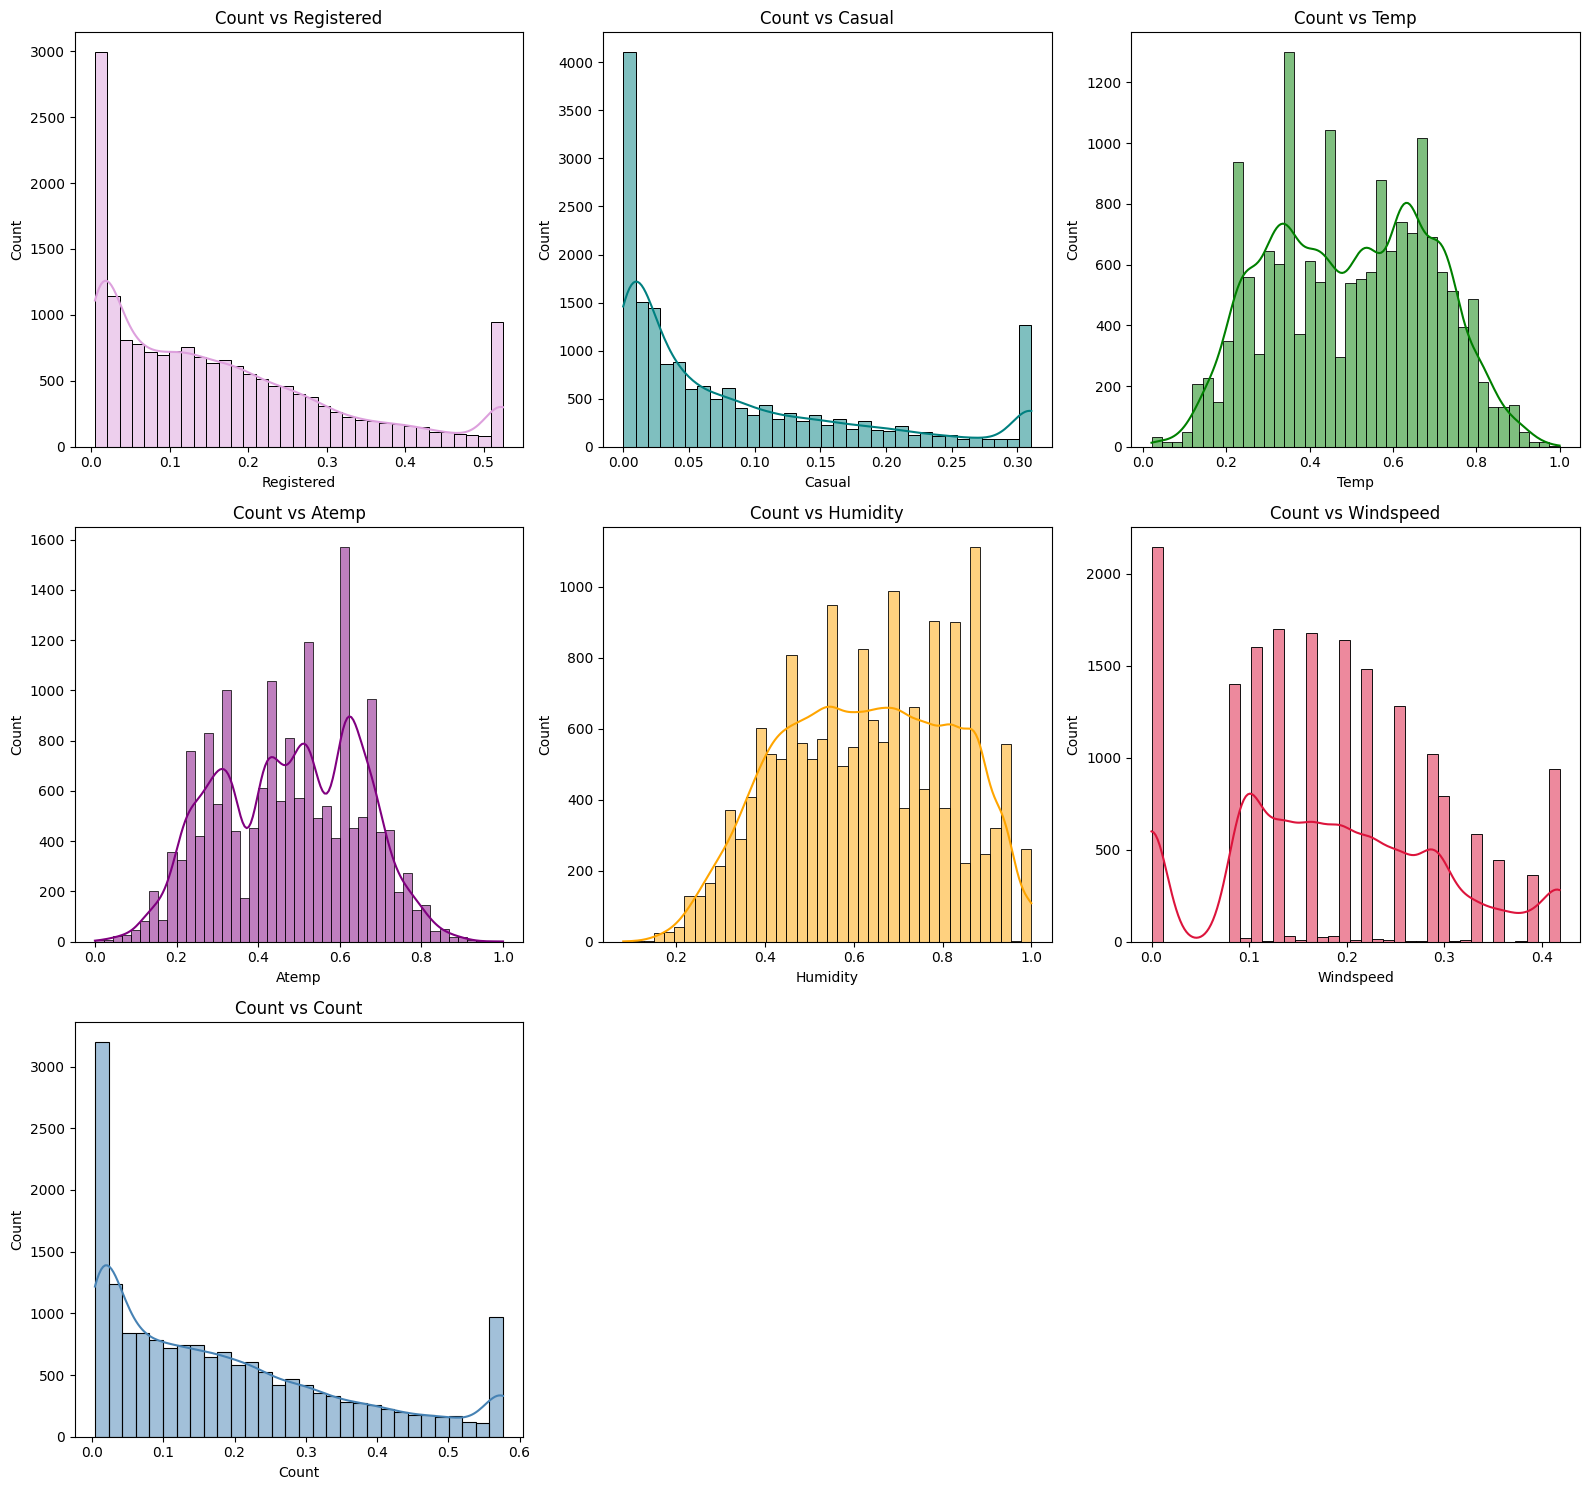

In [41]:
fig, axes = plt.subplots(3, 3, figsize=(16, 15))

features = ['registered', 'casual', 'temp', 'atemp', 'humidity', 'windspeed', 'count']
titles = ['Count vs Registered', 'Count vs Casual', 'Count vs Temp', 'Count vs Atemp', 'Count vs Humidity', 'Count vs Windspeed', 'Count vs Count']
colors = ['plum', 'teal', 'green', 'purple', 'orange', 'crimson', 'steelblue']

for ax, feature, title, color in zip(axes.flat, features, titles, colors):
    sns.histplot(data=filtered_data, x=feature, ax=ax, kde=True, color=color)
    ax.set_xlabel(feature.capitalize())
    ax.set_title(title)

for i in range(len(features), len(axes.flat)):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()


The previous distributions reveal key patterns in bike rental behavior influenced by user type and weather conditions. Both registered and casual users show a skew toward lower usage, with registered users having a longer tail, indicating the presence of some high-usage individuals. Moderate and mild temperatures are correlated with higher bike rental numbers, implying that weather comfort plays a key role in bike usage. In contrast, extreme temperatures, high humidity, and strong winds have a negative effect on bike rentals, resulting in decreased usage during these conditions.

### Encoding Categorical Data

Encoding Categorical features using One-Hot Encoding helps in the process of feature selection and dimensionality reduction, by deciding which columns are most important and which aren’t.

In [42]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17262 entries, 0 to 17299
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17262 non-null  category
 1   month       17262 non-null  category
 2   hour        17262 non-null  category
 3   holiday     17262 non-null  category
 4   weekday     17262 non-null  category
 5   workingday  17262 non-null  category
 6   weather     17262 non-null  category
 7   temp        17262 non-null  float64 
 8   atemp       17262 non-null  float64 
 9   humidity    17262 non-null  float64 
 10  windspeed   17262 non-null  float64 
 11  casual      17262 non-null  float64 
 12  registered  17262 non-null  float64 
 13  count       17262 non-null  float64 
dtypes: category(7), float64(7)
memory usage: 1.2 MB


We'll be doing one-hot encoding on the categorical features, which will help decide if certain features actually affect the data or not.

In [43]:
categorical_columns1 = ['season', 'weekday']
categorical_columns2 = ['month', 'hour', 'holiday', 'workingday', 'weather']

data_encoded = filtered_data.copy()

for feature in categorical_columns2:
  enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
  df_feature = enc.fit_transform(data_encoded[[feature]])
  feature_names = enc.get_feature_names_out([feature])
  df_feature_df = pd.DataFrame(df_feature, columns=feature_names)
  df_feature_df.reset_index(drop=True, inplace=True)
  data_encoded = pd.concat([data_encoded.reset_index(drop=True), df_feature_df], axis=1)


for feature in categorical_columns1:
  enc = OneHotEncoder(handle_unknown='ignore')
  enc.fit(data_encoded[[feature]])
  df_feature = enc.transform(data_encoded[[feature]]).toarray()
  data_encoded[enc.categories_[0]] = df_feature

data_encoded = data_encoded.drop(columns=categorical_columns1)
data_encoded = data_encoded.drop(columns=categorical_columns2)

data_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

,temp,atemp,humidity,windspeed,casual,registered,count,month_1.0,month_2.0,month_3.0,month_4.0,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,month_10.0,month_11.0,month_12.0,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_0.0,holiday_1.0,workingday_0,workingday_1,weather_1.0,weather_2.0,weather_3.0,weather_4.0,Fall,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.24,0.2879,0.81,0.0000,0.008174,0.014673,0.015369,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.22,0.2727,0.80,0.0000,0.021798,0.036117,0.039959,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.22,0.2727,0.80,0.0000,0.013624,0.030474,0.031762,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.24,0.2879,0.75,0.0000,0.008174,0.011287,0.012295,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.24,0.2879,0.75,0.0000,0.000000,0.004515,0.004098,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17257,0.26,0.2576,0.60,0.1642,0.029973,0.121896,0.120902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17258,0.26,0.2576,0.60,0.1642,0.021798,0.091422,0.090164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17259,0.26,0.2576,0.60,0.1642,0.019074,0.093679,0.091189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17260,0.26,0.2727,0.56,0.1343,0.035422,0.054176,0.061475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
data_encoded.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count', 'month_1.0', 'month_2.0', 'month_3.0', 'month_4.0',
       'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0', 'month_9.0',
       'month_10.0', 'month_11.0', 'month_12.0', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'holiday_0.0', 'holiday_1.0', 'workingday_0',
       'workingday_1', 'weather_1.0', 'weather_2.0', 'weather_3.0',
       'weather_4.0', 'Fall', 'Spring', 'Summer', 'Winter', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [59]:
# save the final cleaned dataset to cleaned_data.csv
data_encoded.to_csv('encoded_data.csv', index=False)

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Descriptive Statistics

In [45]:
data_encoded.describe()

,temp,atemp,humidity,windspeed,casual,registered,count,month_1.0,month_2.0,month_3.0,month_4.0,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,month_10.0,month_11.0,month_12.0,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_0.0,holiday_1.0,workingday_0,workingday_1,weather_1.0,weather_2.0,weather_3.0,weather_4.0,Fall,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000,17262.000000
mean,0.497349,0.476239,0.628008,0.186377,0.085128,0.166416,0.187267,0.080813,0.077685,0.084057,0.083246,0.085680,0.083420,0.086201,0.084057,0.083246,0.083073,0.082609,0.085911,0.041768,0.041768,0.041247,0.040204,0.040030,0.041189,0.041594,0.041826,0.041768,0.041768,0.041942,0.041826,0.042000,0.042000,0.042000,0.042058,0.041942,0.041884,0.041884,0.041942,0.041942,0.041826,0.041826,0.041768,0.971035,0.028965,0.317982,0.682018,0.657514,0.261615,0.080697,0.000174,0.259066,0.242498,0.254895,0.243541,0.143321,0.141756,0.144885,0.144132,0.141235,0.141930,0.142741
std,0.192253,0.171567,0.190689,0.113457,0.094897,0.148367,0.168417,0.272556,0.267683,0.277482,0.276262,0.279898,0.276524,0.280669,0.277482,0.276262,0.276000,0.275299,0.280241,0.200064,0.200064,0.198866,0.196443,0.196036,0.198732,0.199666,0.200197,0.200064,0.200064,0.200462,0.200197,0.200594,0.200594,0.200594,0.200727,0.200462,0.200330,0.200330,0.200462,0.200462,0.200197,0.200197,0.200064,0.167714,0.167714,0.465706,0.465706,0.474555,0.439527,0.272378,0.013182,0.438135,0.428606,0.435815,0.429231,0.350410,0.348810,0.351995,0.351233,0.348274,0.348989,0.349819
min,0.020000,0.000000,0.080000,0.000000,0.000000,0.004515,0.004098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500,0.010899,0.038375,0.039959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.484800,0.630000,0.186570,0.046322,0.130926,0.145492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000

The functions describe() provides a list of statical values such as: count, mean, std, min, max, and percentiles.



*   Count: the number of values in the column
*   Mean: the average value of the data.
*   Standard Deviation (STD): The square root of the variance, indicating the spread of data.
*   Min: finds the smallest value in the column.
*   Max: finds the greatest value in the column.
*   Percentiles: Values below which a given percentage of data falls, 25%, 50%, 75%.





### Feature Selection

A good starting point could be selecting around 10-30% of the total number of features.

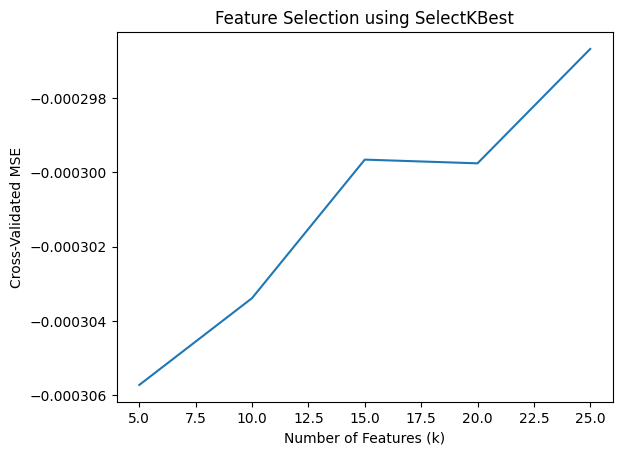

The best number of features (k) is: 25


In [46]:
# Separate features and target
X = data_encoded.drop(columns=['count'])
y = data_encoded['count']

k_values = range(5, 30, 5)
scores = []

for k in k_values:
    selector = SelectKBest(score_func=mutual_info_regression, k=k)
    X_selected = selector.fit_transform(X, y)

    model = LinearRegression()
    score = cross_val_score(model, X_selected, y, cv=5, scoring='neg_mean_squared_error')
    scores.append(score.mean())


plt.plot(k_values, scores)
plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-Validated MSE')
plt.title('Feature Selection using SelectKBest')
plt.show()


best_k = k_values[scores.index(max(scores))]
print(f'The best number of features (k) is: {best_k}')


In [47]:
# Initialize SelectKBest with mutual_info_regression and k=25
selector = SelectKBest(score_func=mutual_info_regression, k=25)

# Fit the selector to the data
selector.fit(X, y)

# Get the scores for each feature
feature_scores = selector.scores_
feature_scores_df = pd.DataFrame(data=feature_scores, index=X.columns, columns=['Score'])

In [48]:
# Sort the features by their scores in descending order
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False).transpose()
feature_scores_df

,registered,casual,atemp,temp,humidity,hour_4,hour_3,hour_5,hour_2,Spring,hour_9,hour_1,hour_17,hour_18,hour_0,hour_23,hour_10,hour_22,weather_3.0,hour_8,Fall,month_1.0,windspeed,hour_21,hour_16,hour_20,hour_12,month_2.0,hour_6,hour_15,workingday_0,Winter,hour_19,weather_2.0,hour_13,month_6.0,hour_11,weather_1.0,month_8.0,month_12.0,hour_7,month_5.0,workingday_1,hour_14,month_9.0,Saturday,month_4.0,month_11.0,month_7.0,month_10.0,Sunday,Friday,month_3.0,holiday_0.0,Monday,weather_4.0,Summer,holiday_1.0,Thursday,Tuesday,Wednesday
Score,2.129222,0.709673,0.13707,0.132428,0.089145,0.080521,0.061925,0.052984,0.050368,0.044615,0.040569,0.03666,0.035178,0.031506,0.030408,0.028129,0.025309,0.02352,0.021413,0.021289,0.021229,0.020909,0.019242,0.019218,0.018866,0.018363,0.017734,0.016736,0.016513,0.015588,0.015535,0.015097,0.015055,0.013925,0.013755,0.013687,0.01265,0.009348,0.008754,0.00842,0.00785,0.007408,0.007116,0.006353,0.006144,0.005215,0.004049,0.003863,0.003836,0.002492,0.002459,0.001688,0.001455,0.000894,0.000289,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Get the selected features
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]

# Transform the dataset to contain only the selected features
X_selected = selector.transform(X)

# Print the selected feature names
print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'month_1.0', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_8', 'hour_9', 'hour_10', 'hour_16', 'hour_17', 'hour_18',
       'hour_21', 'hour_22', 'hour_23', 'weather_3.0', 'Fall', 'Spring'],
      dtype='object')


In [50]:
# create a DataFrame with the selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)
X_selected_df

,temp,atemp,humidity,windspeed,casual,registered,month_1.0,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_8,hour_9,hour_10,hour_16,hour_17,hour_18,hour_21,hour_22,hour_23,weather_3.0,Fall,Spring
0,0.24,0.2879,0.81,0.0000,0.008174,0.014673,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.22,0.2727,0.80,0.0000,0.021798,0.036117,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.22,0.2727,0.80,0.0000,0.013624,0.030474,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.24,0.2879,0.75,0.0000,0.008174,0.011287,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.24,0.2879,0.75,0.0000,0.000000,0.004515,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17257,0.26,0.2576,0.60,0.1642,0.029973,0.121896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17258,0.26,0.2576,0.60,0.1642,0.021798,0.091422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17259,0.26,0.2576,0.60,0.1642,0.019074,0.093679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17260,0.26,0.2727,0.56,0.1343,0.035422,0.054176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [58]:
# save the selected features dataset to selected_data.csv
X_selected_df.to_csv('selected_data.csv', index=False)

### Dimensionality Reduction

For this, we'll be using PCA on the filtered dataset.

To determine the number of components to retain, which should be around 90-95% of the total number. We'll plot the number of components against the cumulative variance, then decide where it starts to faltten out.

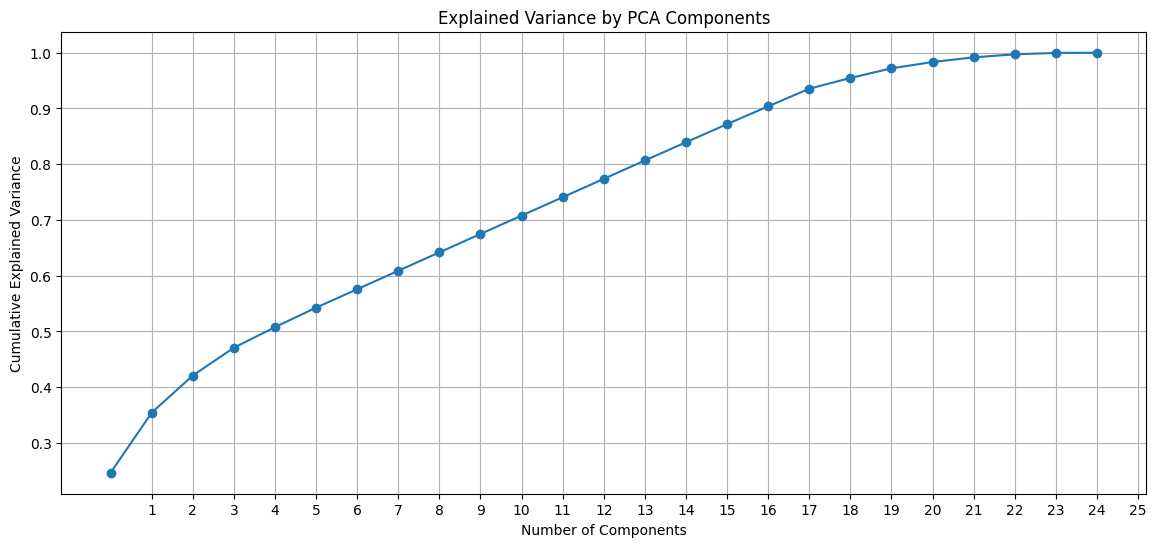

In [51]:
X_scaled = X_selected_df.copy()
pca = PCA().fit(X_scaled)

# Plot the cumulative explained variance
plt.figure(figsize=(14, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.xticks(range(1, len(np.cumsum(pca.explained_variance_ratio_)) + 1))
plt.grid()
plt.show()

We can see that it flattens out around 23, which is 92% of the total number of components.

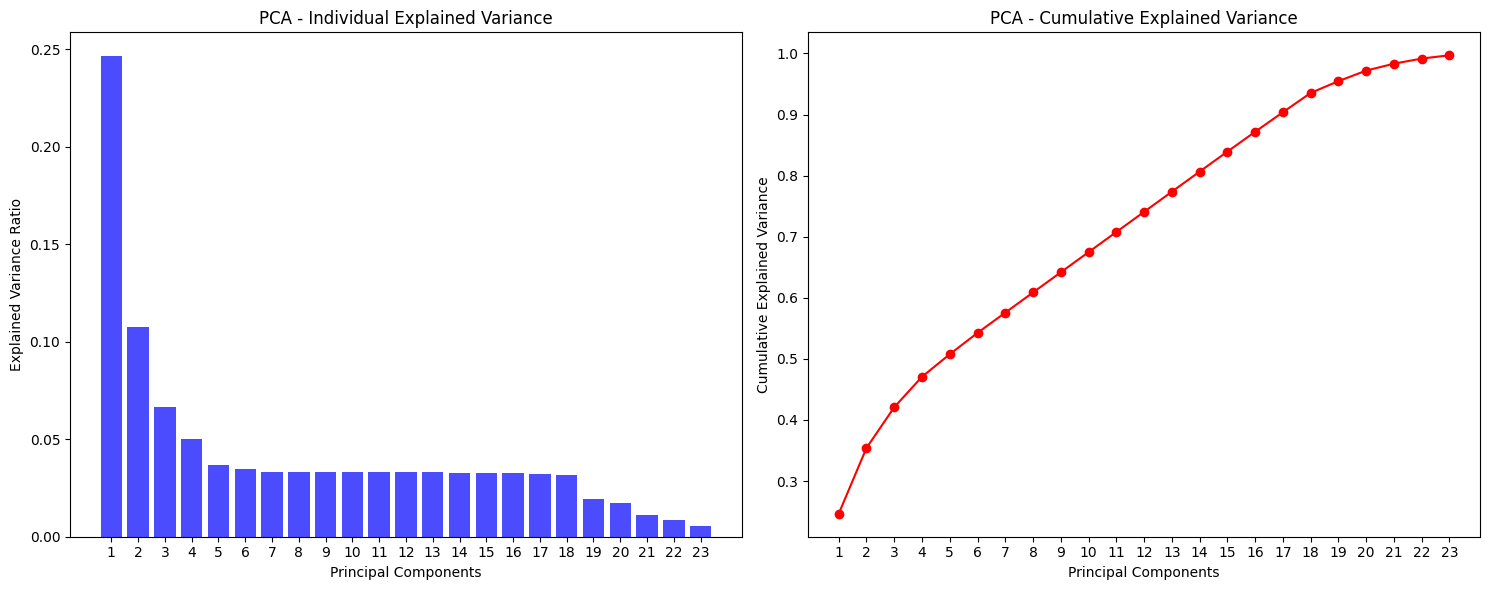

Cumulative explained variance for 23 components: 0.9971168379890344


In [52]:
n_components = 23
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# First subplot for individual explained variance
ax[0].bar(range(1, n_components + 1), explained_variance, alpha=0.7, color='blue', align='center')
ax[0].set_xlabel('Principal Components')
ax[0].set_ylabel('Explained Variance Ratio')
ax[0].set_title('PCA - Individual Explained Variance')
ax[0].set_xticks(range(1, n_components + 1))

# Second subplot for cumulative explained variance
ax[1].plot(range(1, n_components + 1), np.cumsum(explained_variance), marker='o', color='red')
ax[1].set_xlabel('Principal Components')
ax[1].set_ylabel('Cumulative Explained Variance')
ax[1].set_title('PCA - Cumulative Explained Variance')
ax[1].set_xticks(range(1, n_components + 1))

# Adjust layout
plt.tight_layout()
plt.show()

cumulative_variance = np.cumsum(explained_variance)
print(f'Cumulative explained variance for {n_components} components: {cumulative_variance[-1]}')

In [53]:
# Create a new DataFrame 'df_PCA' from the transformed data
data_PCA = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
data_PCA.reset_index(drop=True, inplace=True)

# # Display the first few rows of the new DataFrame
data_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,1.011333,0.538651,0.127576,-0.283241,0.483520,-0.172703,-0.128269,-0.085147,-0.004407,-0.037940,-0.301085,-0.259178,-0.593008,-0.464485,-0.344447,0.004396,-0.130765,-0.045258,0.147760,-0.182052,-0.019726,-0.115311,-0.040891
1,1.019890,0.536885,0.134391,-0.301043,0.491417,-0.164964,-0.115991,-0.061475,0.002422,-0.039551,-0.320185,-0.039508,0.751295,-0.089991,-0.379434,0.012677,-0.145320,-0.047591,0.123390,-0.171876,-0.011424,-0.125703,-0.080359
2,1.020096,0.535092,0.146723,-0.313191,0.508920,-0.140034,-0.026538,-0.007377,0.002874,-0.000615,-0.024759,0.014011,-0.006547,-0.001047,0.528195,0.701278,-0.269446,-0.060281,0.104775,-0.179317,-0.019495,-0.125637,-0.083496
3,1.010873,0.537217,0.131777,-0.311075,0.458615,-0.106924,-0.011495,-0.002951,0.001196,0.000714,-0.008234,0.006546,-0.003856,0.001191,0.094159,-0.019034,0.717143,-0.619831,0.043138,-0.184599,-0.053045,-0.139144,-0.072211
4,1.011989,0.537310,0.143910,-0.322132,0.514091,-0.104856,-0.005076,0.001686,0.002076,0.001243,-0.007801,0.012877,-0.005709,-0.001018,0.081681,-0.024788,0.485535,0.773781,0.023001,-0.189612,-0.061762,-0.149312,-0.067442


In [54]:
data_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17262 entries, 0 to 17261
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     17262 non-null  float64
 1   PC2     17262 non-null  float64
 2   PC3     17262 non-null  float64
 3   PC4     17262 non-null  float64
 4   PC5     17262 non-null  float64
 5   PC6     17262 non-null  float64
 6   PC7     17262 non-null  float64
 7   PC8     17262 non-null  float64
 8   PC9     17262 non-null  float64
 9   PC10    17262 non-null  float64
 10  PC11    17262 non-null  float64
 11  PC12    17262 non-null  float64
 12  PC13    17262 non-null  float64
 13  PC14    17262 non-null  float64
 14  PC15    17262 non-null  float64
 15  PC16    17262 non-null  float64
 16  PC17    17262 non-null  float64
 17  PC18    17262 non-null  float64
 18  PC19    17262 non-null  float64
 19  PC20    17262 non-null  float64
 20  PC21    17262 non-null  float64
 21  PC22    17262 non-null  float64
 22

## Training Model on Data

Training and testing will be conducted for the original data, the data after feature selection, and the final cleaned data after PCA. All three will be split into training and testing data, and their results will be compared.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_filtered_train, X_filtered_test, y_filtered_train, y_filtered_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a regressor on the original features and evaluate
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_original = r2_score(y_test, y_pred)

# Train a regressor on the selected features and evaluate
regressor.fit(X_filtered_train, y_filtered_train)
y_pred_filtered = regressor.predict(X_filtered_test)
r2_filtered = r2_score(y_filtered_test, y_pred_filtered)

# Train a regressor on the PCA-transformed features and evaluate
regressor.fit(X_pca_train, y_pca_train)
y_pred_pca = regressor.predict(X_pca_test)
r2_pca = r2_score(y_pca_test, y_pred_pca)

print(f"Number of original features: {X_train.shape[1]}")
print(f"Number of features after feature selection: {X_filtered_train.shape[1]}")
print(f"Number of features after PCA: {X_pca_train.shape[1]}")
print(f"R-squared of Original features (testing accuracy): {r2_original}")
print(f"R-squared after feature selection (testing accuracy): {r2_filtered}")
print(f"R-squared after PCA (testing accuracy): {r2_pca}")

Number of original features: 61
Number of features after feature selection: 25
Number of features after PCA: 23
R-squared of Original features (testing accuracy): 0.996840633467523
R-squared after feature selection (testing accuracy): 0.9961504936433935
R-squared after PCA (testing accuracy): 0.9822366783419034


- The original features model demonstrated a strong fit, explaining 99.68% of the variance in the target feature ‘count’, indicating a very strong fit.
- The selected features model, on the other hand, explained 99.61% of the variance, indicating a high level of explanation despite a very slight drop (0.07%) compared to the original feature model.
- Finally, the PCA-transformed features model explained 98.82% of the variance, also indicating a high level of explanation despite a slight drop (0.1986%) compared to the original feature model.

</br>

Using feature selection and PCA has reduced the dimensionality of the dataset significantly (from 61 features to 23) while retaining a substantial amount of the information (variance) in the data. This means all the preprocessing work done before is valid and contributes to building a good learning model.


In [56]:
# save the final cleaned dataset to cleaned_data.csv
data_PCA.to_csv('preprocessed_data.csv', index=False)